In [1]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
from torch.utils.data import TensorDataset, DataLoader

### Data visualization

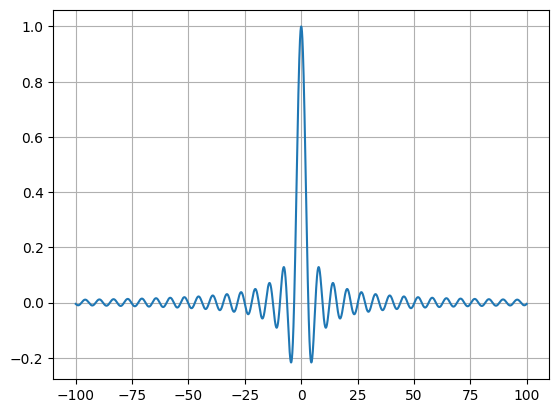

In [2]:
x_data = np.linspace(-100, 100, 30000)
y_data = np.sin(x_data) / x_data
plt.plot(x_data, y_data)
plt.grid()
plt.show()

In [15]:
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
dataset = TensorDataset(torch.tensor(x_data).float(), torch.tensor(y_data).float())

trainsize, testsize = int(0.9*len(dataset)), len(dataset)-int(0.9*len(dataset))
trainset, testset = torch.utils.data.random_split(dataset, [trainsize, testsize], generator=torch.Generator().manual_seed(42))

trainloader = DataLoader(trainset, batch_size=128, shuffle=True)
testloader = DataLoader(testset, batch_size=128, shuffle=False)

In [26]:
trainset.dataset.tensors[0].shape

torch.Size([30000])

In [4]:
class ELM(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super().__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.activation = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = self.fc1(x)
        x = self.activation(x)
        x = self.fc2(x)
        return x

model = ELM(1, 1000, 1).to(device)

In [5]:
# model.fc2.weight.data = torch.tensor(y_data).float().view(1, -1) * 
# model.fc2.weight.data.shape
torch.concatenate([torch.ones(1, 10), nn.ReLU(model.fc1.bias.data + model.fc1.weight.data * 1)], dim=0)

SyntaxError: invalid syntax (332032074.py, line 3)

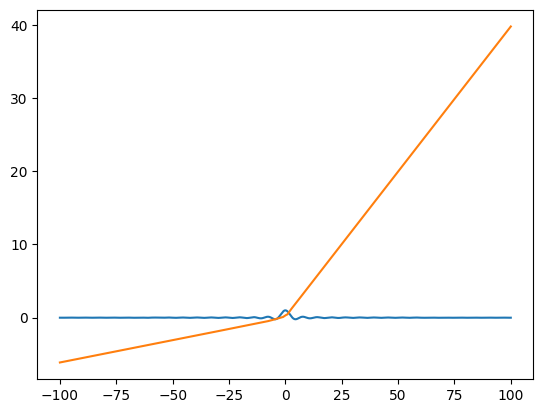

In [ ]:
plt.plot(x_data, y_data)
plt.plot(x_data, model(torch.tensor(x_data).reshape(-1, 1).float().to(device)).cpu().detach().numpy())
plt.show()